1.Import relevant commands for numpy, pandas, sklearn.

In [102]:
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv, to_numeric
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score



import math

Q1: Create the following training datasets from the optdigits.tra set: 
X25: Randomly chosen N=25 instances from each class. 
X100:  Randomly chosen N=100 instances from each class


In [103]:
#Read Training Data
train_data = read_csv(r'C:\Users\gangareddy\Documents\GitHub\MLprojects\Assignment3\optdigits.tra', sep=",",header=None)
test_data= read_csv(r'C:\Users\gangareddy\Documents\GitHub\MLprojects\Assignment3\optdigits.tes', sep=",",header=None)
#print(train_data.head())
train_data
test_data

Xtrain_25 = train_data.sample(25)
Xtrain_100 = test_data.sample(100)
#print(Xtrain_25)
#print(Xtrain_100)

classes =10
for i in range(1,classes,1):
    Xtrain_25 = Xtrain_25.append(train_data[train_data[64] == i].sample(25))
    Xtrain_100 = Xtrain_100.append(train_data[train_data[64] == i].sample(100))

print(Xtrain_25)
print(Xtrain_100)

ytrain_25 = Xtrain_25[64]
ytrain_100 = Xtrain_100[64]





      0   1   2   3   4   5   6   7   8   9   ...  55  56  57  58  59  60  61  \
1216   0   0   0   1  16   5   0   0   0   0  ...   0   0   0   0   1  16   9   
1925   0   0  15  15   4   0   0   0   0   0  ...   0   0   1  11  15  12  15   
3270   0   0   1  14   2   0   0   0   0   0  ...   0   0   0   0  13  16  16   
1920   0   0   1  14  15   3   0   0   0   0  ...   0   0   0   2  12  16   5   
696    0   0   9  15  16   8   0   0   0   0  ...   0   0   0  10  12   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
2395   0   0   0   5   9  13  14   6   0   0  ...   0   0   0   0   5  14   0   
2005   0   0   4  12  12   0   0   0   0   2  ...   0   0   0   5  14  16  11   
2750   0   0   2  11  13  11   3   0   0   0  ...   0   0   0   1  14   0   0   
3216   0   0  11  12   7   0   0   0   0   3  ...   0   0   0  10  16  13   8   
1714   0   0   9  16  11   0   0   0   0   5  ...   0   0   0   5  12  12   6   

      62  63  64  
1216   0

Q2: Decision Trees, classification: 
Use library sklearn.tree.DecisionTreeClassifier
 algorithm. For the DecisionTreeClassifier determine the value of the tree depth parameter (experiment with depth=2, 3, 5, 10)  that results in the best test error. Report the training and test errors for each depth value and the training set. How does the best depth value change as the number of instances change? 
Note: Check the depth of the your trained decision tree, by e.g. plotting the tree.


In [104]:
Xtest = test_data
ytest = test_data[64]
TrainingError_25 = []
TestingError_25=[]

TrainingError_100 = []
TestingError_100=[]
index=[]

#storing the max_depth parameters in a list
mdepth=[2,3,5,10]
#train with 25 instances from each class


for i in mdepth:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(Xtrain_25,ytrain_25)
        a1=model.score(Xtrain_25,ytrain_25)
        a2=model.score(Xtest,ytest)
        TrainingError_25.append(1-a1)
        TestingError_25.append(1-a2)

#train with 100 instances from each class

for i in mdepth:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(Xtrain_100,ytrain_100)
        y_pred = model.predict(Xtrain_100)
        y_pred1= model.predict(Xtest)
        x1=accuracy_score(ytrain_100,y_pred)
        x2=accuracy_score(ytest,y_pred1)
        TrainingError_100.append(1-x1)
        TestingError_100.append(1-x2)
        temp = 'Max_Depth = '+str(i)
        index.append(temp)

columns = ['Training Error','Test Error']

Error_list_25=[]
Error_list_100=[]
for i in range(len(TrainingError_25)):
    Error_list_25.append([TrainingError_25[i],TestingError_25[i]])
    Error_list_100.append([TrainingError_100[i],TestingError_100[i]] )
    
print("Results with 25 instances")   
df_train_error_25 = pd.DataFrame(Error_list_25,columns=columns,index=index)
print(df_train_error_25.head(20)) 

print()
print("Results with 100 instances")   
df_train_error_100 = pd.DataFrame(Error_list_100,columns=columns,index=index)
print(df_train_error_100.head(20))



Results with 25 instances
                Training Error  Test Error
Max_Depth = 2            0.652    0.632721
Max_Depth = 3            0.536    0.565387
Max_Depth = 5            0.104    0.136338
Max_Depth = 10           0.000    0.041736

Results with 100 instances
                Training Error  Test Error
Max_Depth = 2            0.660    0.697830
Max_Depth = 3            0.437    0.499165
Max_Depth = 5            0.000    0.000000
Max_Depth = 10           0.000    0.002782


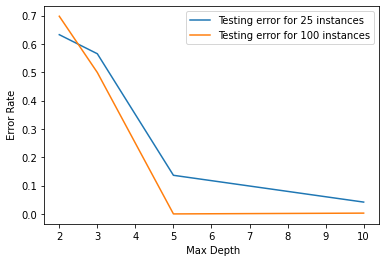

In [105]:
plt.plot(mdepth,TestingError_25,label='Testing error for 25 instances')
plt.plot(mdepth,TestingError_100,label='Testing error for 100 instances')
plt.legend()
plt.xlabel(' Max Depth')
plt.ylabel(' Error Rate')

plt.show()

Q2:Repeat Q1 using XGBoost and LightGBM algorithms. Experiment with at least 5 different parameter settings to see their effect on training and test errors. How do best parameters change as the #training instances change? 

In [106]:
model = XGBClassifier()
model.fit(Xtrain_25,ytrain_25) 



C:\Users\gangareddy\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:21:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)